In [57]:
from hmmlearn.hmm import GaussianHMM
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


AAPL_PATH = '/Users/lizhen/Desktop/GT23Fall/MachineLearning/project/archive/Technology Companies/AAPL.csv'


In [58]:


# Load your data
data = pd.read_csv(AAPL_PATH)

# Select features - for example, Close prices
features = data[['Close']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data
train_size = int(0.65 * len(scaled_features))
train_data = scaled_features[:train_size]
test_data = scaled_features[train_size:]

# Create and train Gaussian HMM
model = GaussianHMM(n_components=4)
model.fit(train_data)

# Predict the hidden states on test data
hidden_states = model.predict(test_data)

# Further steps could involve translating these hidden states into meaningful market trends or insights.


[[95.26358346]
 [71.91465525]
 [25.21679884]
 ...
 [25.21679884]
 [25.21679884]
 [25.21679884]]


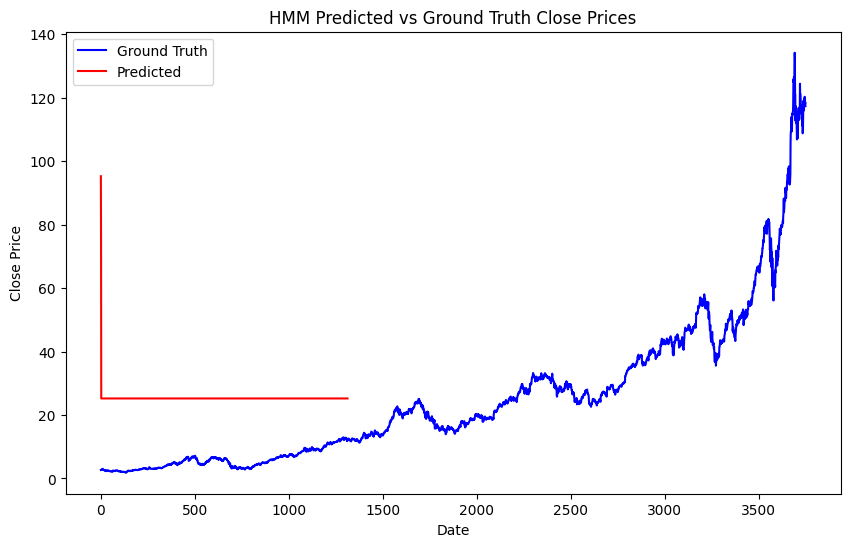

In [59]:
import matplotlib.pyplot as plt

df = data
plt.figure(figsize=(10, 6))
plt.plot(df.index, scaler.inverse_transform(scaled_features), label='Ground Truth', color='blue')
# plt.plot(df.index, scaler.inverse_transform(hidden_states.reshape(-1, 1)), label='Predicted', color='red')
print(scaler.inverse_transform(hidden_states.reshape(-1, 1)))
plt.plot(df.index[:len(hidden_states)], scaler.inverse_transform(hidden_states.reshape(-1, 1)), label='Predicted', color='red') 
plt.title('HMM Predicted vs Ground Truth Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()